# Sentiment analysis in R

### About the Dataset
###### Serial Number 
###### tweets - contains tweets about ChatGPT
######   labels - (Target variable) describes about the tweets 
######   
Data set - https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis

##  Read the dataset

In [97]:
#read the dataset
data = read.csv("C:\\Users\\akshi\\Downloads\\archive (1)\\chatgpt.csv",stringsAsFactors = FALSE)

In [57]:
head(data)

X,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral
1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good
2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral
3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good
4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now ðŸ‘‡ https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad
5,"Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64",good


In [58]:
#delete unwanted columns
data = data[,-1]
data = data[1:6000,]

In [59]:
options(warn=-1)

In [ ]:
#install text mining packages
install.packages('tm')

In [7]:
library(tm)

Loading required package: NLP


##  Creating a Corpus

In [60]:
#create a Vcorpus object 
corpus = VCorpus(VectorSource(data$tweets))

## EDA

In [61]:
#cleaning the text
#convert to lowercase
corpus = tm_map(corpus,content_transformer(tolower))

In [62]:
as.character(corpus[[5]])

[1] "as of 2 minutes ago, @openai released their new chatgpt. \\n\\nand you can use it right now ðÿ‘‡ https://t.co/vypgpnw988 https://t.co/csn5h6h1m1"

In [63]:
#removing links from text
remove_links = function(text) {
  cleaned_text = gsub("(http|https)://[[:alnum:]/\\.]+", "", text)
  return(cleaned_text)
}

for (i in 1:length(corpus)) {
  corpus[[i]] <- content_transformer(remove_links)(corpus[[i]])
}


In [64]:
#removing any special characters 
remove_special_chars <- function(text) {
  cleaned_text <- gsub("[^a-z ]+", "", text)
  return(cleaned_text)
  
}
for (i in 1:length(corpus)) {
  corpus[[i]] <- content_transformer(remove_special_chars)(corpus[[i]])
}

In [65]:
#remove stopwords and perform stemming
corpus = tm_map(corpus,removeWords,stopwords())
corpus = tm_map(corpus,stemDocument)
corpus = tm_map(corpus,stripWhitespace)

In [66]:
as.character(corpus[[5]])

[1] "minut ago openai releas new chatgpt nnand can use right now"

## Bag of Words Model

In [67]:
#creating the bag of words model
dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm,0.999)

In [79]:
dtm

<<DocumentTermMatrix (documents: 6000, terms: 1307)>>
Non-/sparse entries: 50321/7791679
Sparsity           : 99%
Maximal term length: 47
Weighting          : term frequency (tf)

In [68]:
#convert to dataframe
dataset = as.data.frame(as.matrix(dtm))

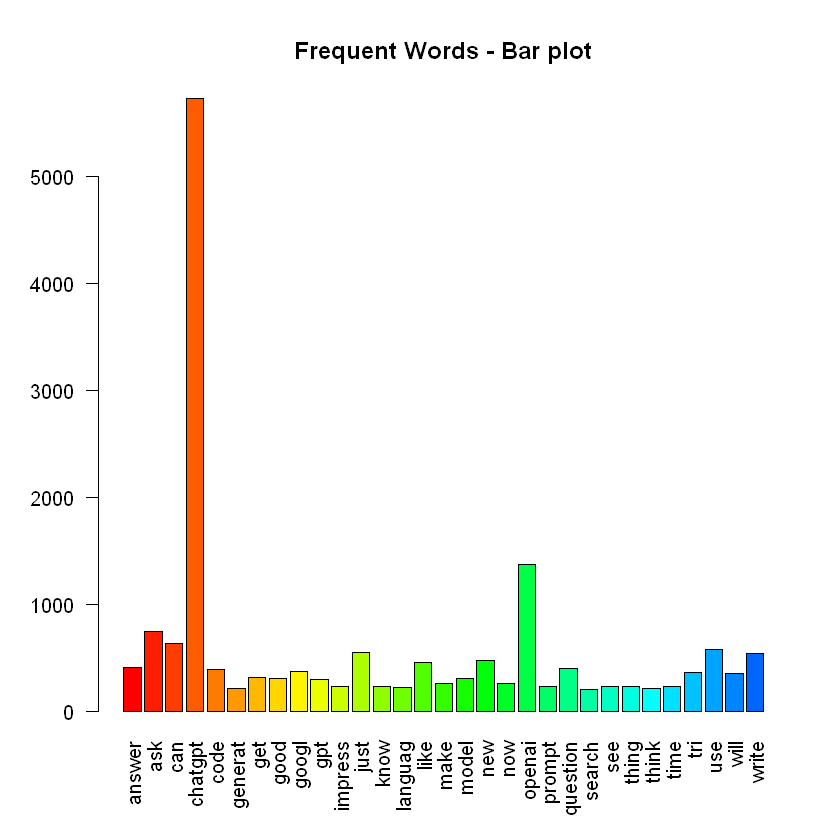

In [70]:
#barplot
w = colSums(dataset)
w = subset(w, w>=200)
barplot(w, 
        las = 2,
        col = rainbow(50),
        main = "Frequent Words - Bar plot")

## Word Cloud

In [18]:
install.packages("wordcloud", repos='http://cran.us.r-project.org')

package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\akshi\AppData\Local\Temp\RtmpwhwlMt\downloaded_packages


In [19]:
library(wordcloud)

Loading required package: RColorBrewer


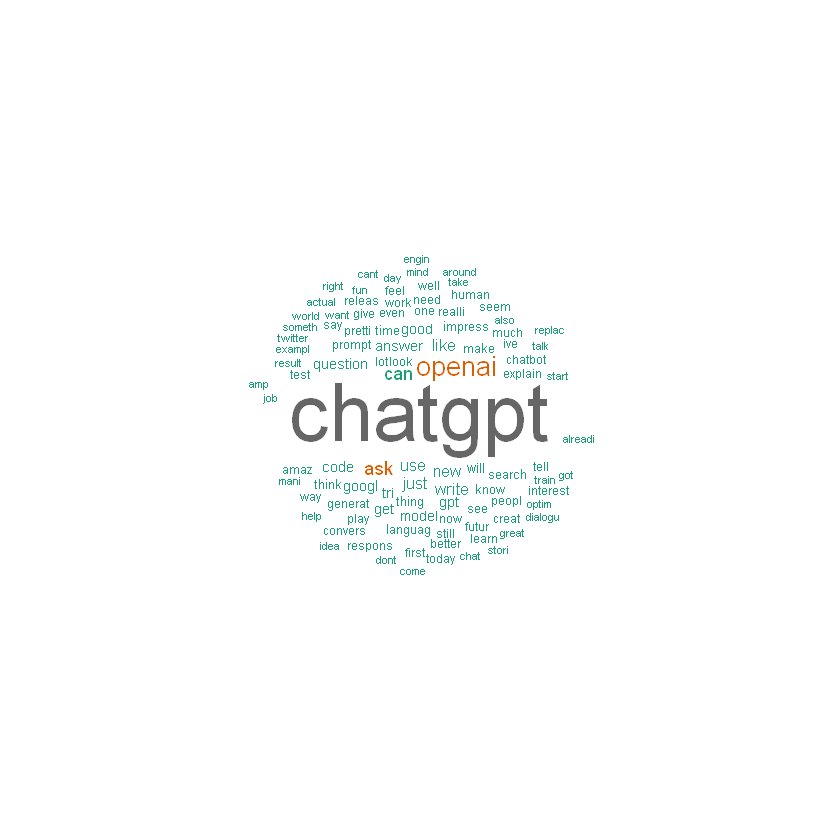

In [71]:
#word cloud 
w = sort(colSums(dataset),decreasing = TRUE)
wordcloud(words = names(w),
          freq = w,
          random.order = FALSE,
          colors = brewer.pal(8,"Dark2"),
          max.words = 100,
          rot.per = 0,
          main = "Word Cloud")

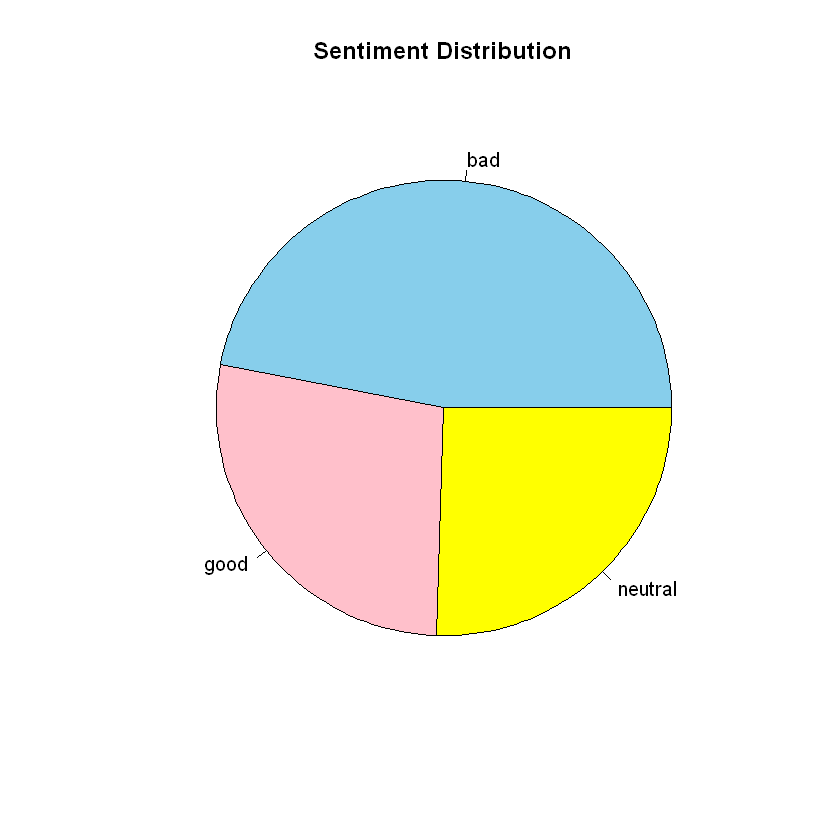

In [72]:
#pie chart
freq = table(data$labels)
#freq = rowSums(data$labels)
pie(freq, labels = names(freq), col = c("skyblue","pink","yellow"),main = "Sentiment Distribution")

## Associations Among Words

In [73]:
#finding associations between three most frequent words
associations = findAssocs(dtm, terms = c("chatgpt","openai","ask"), corlimit = 0.1)
print(associations)

$chatgpt
numeric(0)

$openai
    new chatbot  releas  sitcom   debut     gpt  easili   trick 
   0.23    0.19    0.15    0.14    0.12    0.12    0.11    0.11 

$ask
question    write     gave    login    react     form password    build 
    0.19     0.17     0.16     0.16     0.15     0.14     0.14     0.13 
 contain    email 
    0.11     0.11 



In [74]:
#associations between higher frequency terms
asso = findAssocs(dtm, terms = findFreqTerms(dtm, lowfreq = 300), corlimit = 0.1)
print(asso)

$answer
incorrect  followup    premis     admit      give    mistak  challeng     wrong 
     0.21      0.19      0.18      0.16      0.16      0.15      0.13      0.13 
  correct      demo    direct   version    reject 
     0.12      0.11      0.11      0.11      0.10 

$ask
    gave    login    react     form password    build  contain    email 
    0.16     0.16     0.15     0.14     0.14     0.13     0.11     0.11 

$can
 easili  sitcom   trick chatbot  script explain   still 
   0.24    0.22    0.17    0.14    0.13    0.11    0.10 

$chatgpt
numeric(0)

$code
  sitcom   advent   easili  explain   script    login password    trick 
    0.27     0.21     0.21     0.21     0.20     0.17     0.17     0.17 
   debug    react    still  chatbot     form   python   explan      fix 
    0.16     0.16     0.15     0.13     0.13     0.13     0.11     0.11 
    gave  generat    build 
    0.11     0.11     0.10 

$get
numeric(0)

$good
societi 
    0.1 

$googl
      search       replac done

In [75]:
#encoding the labels
data$labels = factor(data$labels,
                     levels = c('neutral','good','bad'),
                     labels = c(1,2,3))
dataset$labels = data$labels

In [ ]:
install.packages("caTools",repos='http://cran.us.r-project.org')

In [26]:
library(caTools)

### Splitting the dataset

In [76]:
#splitting the dataset into train and test
set.seed(223)
split = sample.split(dataset$labels)
train = subset(dataset, split == TRUE)
test = subset(dataset, split == FALSE)


In [78]:
dimen = dim(train)
dimen

[1] 4001 1308

## KNN

In [77]:
library(class)

In [80]:
y_pred = knn(train = train[-1308],
             test = test[-1308],
             cl = train$labels,
             k = 3,
             prob = TRUE)

In [81]:
cn_mx = table(test$labels,y_pred)

In [82]:
cn_mx

   y_pred
      1   2   3
  1 113  10 387
  2  83  89 378
  3  26   5 908

In [83]:
accuracy = sum(y_pred == test$labels) / length(test$labels)
accuracy

[1] 0.5552776

## SVM

In [42]:
library(e1071)

In [84]:
classifier = svm(formula = labels ~ .,
                 data = train,
                 type = 'C-classification',
                 kernel = 'linear')

In [86]:
pred = predict(classifier, newdata = test[-1308])

In [87]:
mx = table(test$labels,pred)
mx

   pred
      1   2   3
  1 286 111 113
  2 168 331  51
  3 239  50 650

In [88]:
accuracy = sum(pred == test$labels) / length(test$labels)
accuracy

[1] 0.6338169

## CART

In [91]:
library(rpart)
library(rpart.plot)

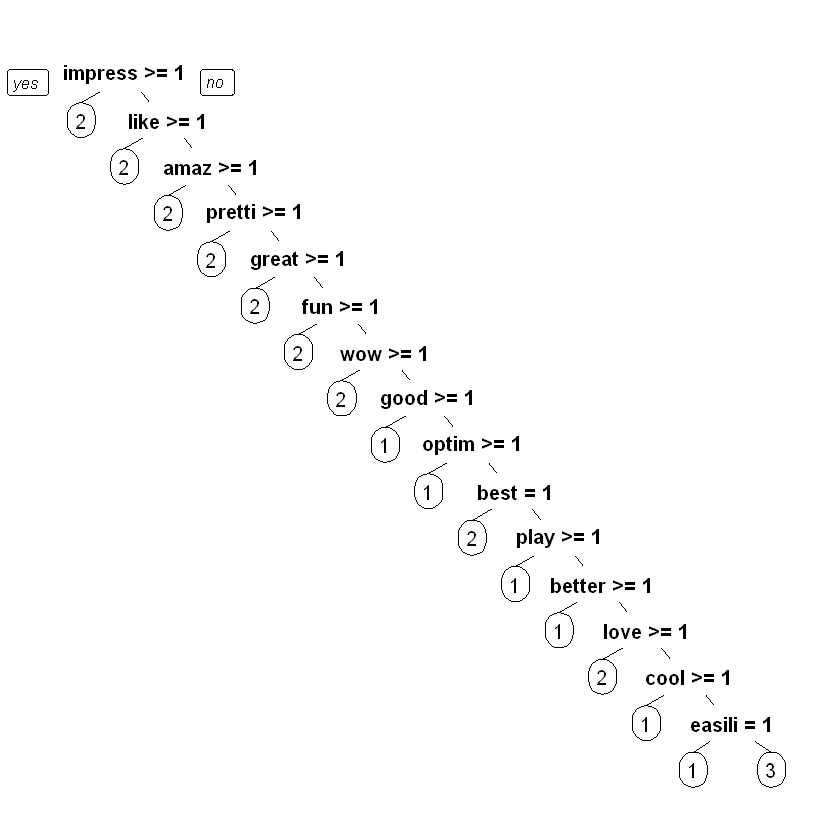

In [92]:
tree = rpart(labels ~ .,data = train, method = "class")
prp(tree)
pred = predict(tree, newdata = test[-1308], type = "class")

In [93]:
mx = table(test$labels,pred)
mx

   pred
      1   2   3
  1 126  78 306
  2  67 299 184
  3  19  29 891

In [94]:
accuracy = sum(pred == test$labels) / length(test$labels)
accuracy

[1] 0.6583292